In [1]:
import utilities as ut

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# For data preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve

# For model evaluation
from sklearn import metrics

# For ML classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# For Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Conv1D, Dropout
from tensorflow.keras import Model
from tensorflow.math import confusion_matrix

# for callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


Dans cet essai on va utiliser chaque capteur à part entière et ensuite classer suivant chaque capteur et par la suite voir quels sont les capteurs qui classent le mieux suivant nos 4 classes et puis tenter un vote entre les différents capteurs.
## Chargement des données

In [2]:
data_air = pd.read_csv('./csv_files/AIR.csv', sep=";", header=None)
data_control = pd.read_csv('./csv_files/CONTROL.csv', sep=";", header=None)
data_copd = pd.read_csv('./csv_files/COPD.csv', sep=";", header=None)
data_smokers = pd.read_csv('./csv_files/SMOKERS.csv', sep=";", header=None)

## Nettoyage des données

In [3]:
data_smokers.drop(list(range(64,128)), inplace=True, axis=1)
data_air.drop(list(range(4000,4080)), inplace=True, axis=0)

## Préparation des données
On va prendre pour chaque datasets chaque capteurs à part entière

In [4]:
data_capteur1_smoker, data_capteur2_smoker, data_capteur3_smoker, data_capteur4_smoker, data_capteur5_smoker,data_capteur6_smoker, data_capteur7_smoker, data_capteur8_smoker = ut.extract_capteur(data_smokers, 8)

data_capteur1_copd, data_capteur2_copd, data_capteur3_copd, data_capteur4_copd, data_capteur5_copd, data_capteur6_copd,data_capteur7_copd, data_capteur8_copd = ut.extract_capteur(data_copd, 40)

data_capteur1_control, data_capteur2_control, data_capteur3_control, data_capteur4_control, data_capteur5_control,data_capteur6_control, data_capteur7_control, data_capteur8_control = ut.extract_capteur(data_control, 20)

data_capteur1_air, data_capteur2_air, data_capteur3_air, data_capteur4_air, data_capteur5_air, data_capteur6_air,data_capteur7_air, data_capteur8_air = ut.extract_capteur(data_air, 10)

On procède maintenant à la concaténation des données pour avoir 8 datasets distincts. Mais avant cela on passe à la labelisation

In [5]:
ut.label(data_capteur1_smoker,data_capteur2_smoker,data_capteur3_smoker,data_capteur4_smoker,data_capteur5_smoker,data_capteur6_smoker,data_capteur7_smoker,data_capteur8_smoker, "smoker")

ut.label(data_capteur1_copd,data_capteur2_copd,data_capteur3_copd,data_capteur4_copd,data_capteur5_copd,data_capteur6_copd,data_capteur7_copd,data_capteur8_copd, "copd")

ut.label(data_capteur1_control,data_capteur2_control,data_capteur3_control,data_capteur4_control,data_capteur5_control,data_capteur6_control,data_capteur7_control,data_capteur8_control, "control")

ut.label(data_capteur1_air,data_capteur2_air,data_capteur3_air,data_capteur4_air,data_capteur5_air,data_capteur6_air,data_capteur7_air,data_capteur8_air, "air")

In [6]:
data_capteur1 = pd.concat([data_capteur1_smoker,data_capteur1_copd, data_capteur1_control, data_capteur1_air])

data_capteur2 = pd.concat([data_capteur2_smoker,data_capteur2_copd, data_capteur2_control, data_capteur2_air])

data_capteur3 = pd.concat([data_capteur3_smoker,data_capteur3_copd, data_capteur3_control, data_capteur3_air])

data_capteur4 = pd.concat([data_capteur4_smoker,data_capteur4_copd, data_capteur4_control, data_capteur4_air])

data_capteur5 = pd.concat([data_capteur5_smoker,data_capteur5_copd, data_capteur5_control, data_capteur5_air])

data_capteur6 = pd.concat([data_capteur6_smoker,data_capteur6_copd, data_capteur6_control, data_capteur6_air])

data_capteur7 = pd.concat([data_capteur7_smoker,data_capteur7_copd, data_capteur7_control, data_capteur7_air])

data_capteur8 = pd.concat([data_capteur8_smoker,data_capteur8_copd, data_capteur8_control, data_capteur8_air])

## Sauvegarde des datasets
On sauvegarde les datasets pour une utilisation future

In [26]:
data_capteur1.to_csv("./capteurs/capteur1.csv", index=False)
data_capteur2.to_csv("./capteurs/capteur2.csv", index=False)
data_capteur3.to_csv("./capteurs/capteur3.csv", index=False)
data_capteur4.to_csv("./capteurs/capteur4.csv", index=False)
data_capteur5.to_csv("./capteurs/capteur5.csv", index=False)
data_capteur6.to_csv("./capteurs/capteur6.csv", index=False)
data_capteur7.to_csv("./capteurs/capteur7.csv", index=False)
data_capteur8.to_csv("./capteurs/capteur8.csv", index=False)

# Classification en utilisant des algorithmes de Machine Learning
## KNN

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9743589743589743
F1-score KNN :  0.9819976771196284
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.91      1.00      0.95        10
        copd       1.00      0.95      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.98      0.99      0.98        39
weighted avg       0.98      0.97      0.97        39



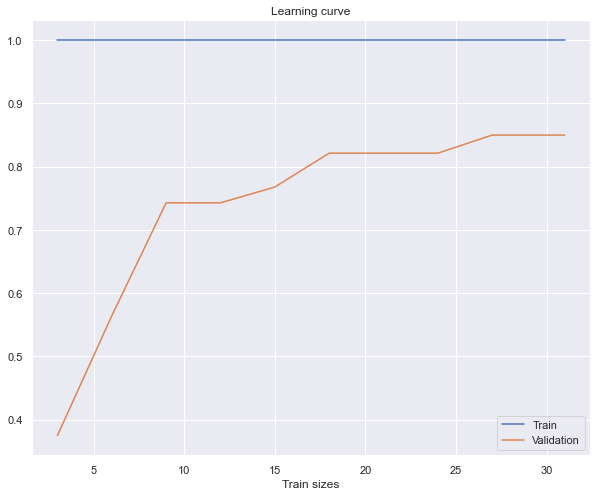

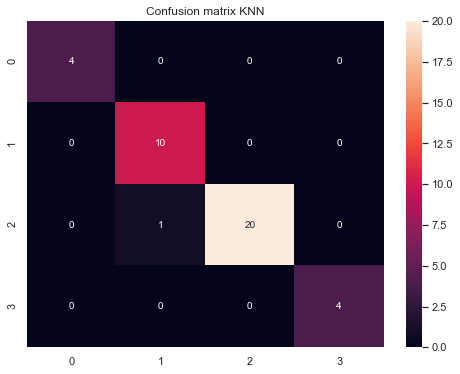

In [7]:
ut.knncapteur(data=data_capteur1,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9487179487179487
F1-score KNN :  0.9647727272727273
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.83      1.00      0.91        10
        copd       1.00      0.90      0.95        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.95        39
   macro avg       0.96      0.98      0.96        39
weighted avg       0.96      0.95      0.95        39



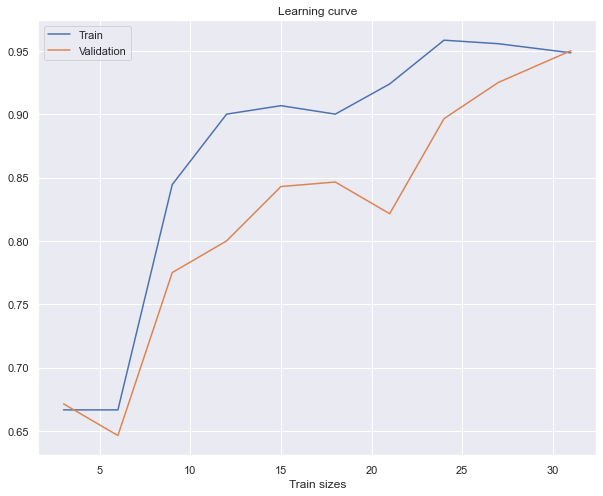

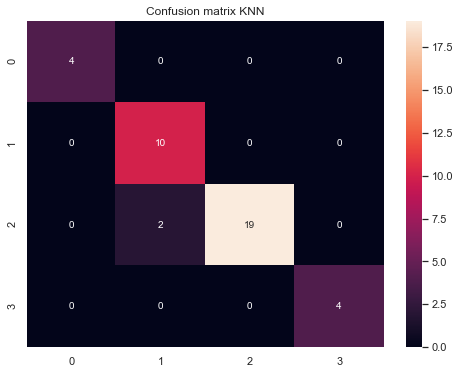

In [8]:
ut.knncapteur(data=data_capteur2,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.sco

Accuracy :  0.9743589743589743
F1-score KNN :  0.9810281517747859
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.90      0.95        10
        copd       0.95      1.00      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.99      0.97      0.98        39
weighted avg       0.98      0.97      0.97        39



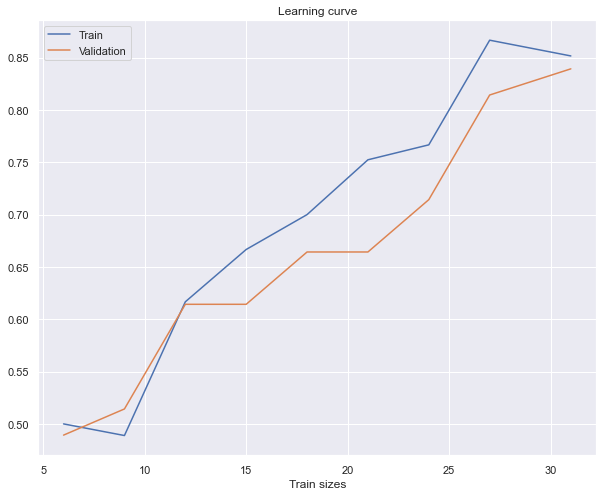

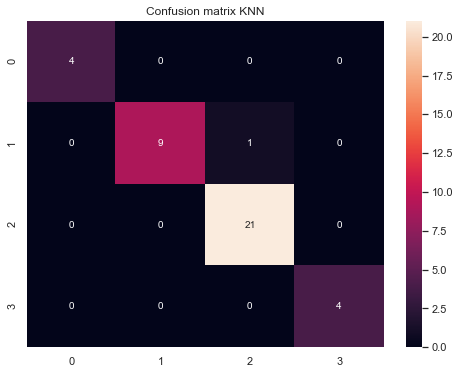

In [9]:
ut.knncapteur(data=data_capteur3,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.sco

Accuracy :  0.8717948717948718
F1-score KNN :  0.846384008148714
              precision    recall  f1-score   support

         air       0.57      1.00      0.73         4
     control       0.86      0.60      0.71        10
        copd       0.95      0.95      0.95        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.87        39
   macro avg       0.85      0.89      0.85        39
weighted avg       0.89      0.87      0.87        39



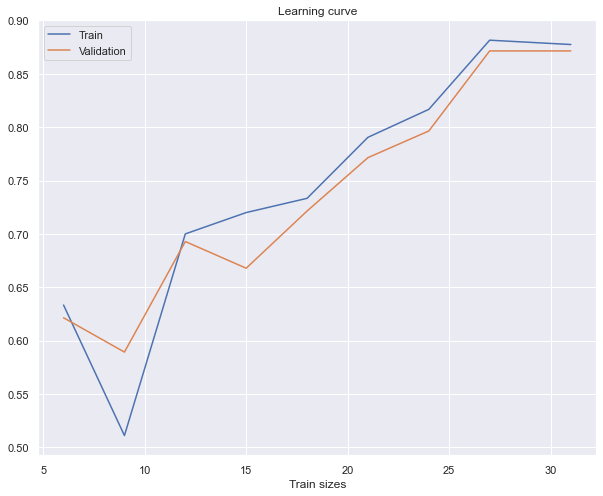

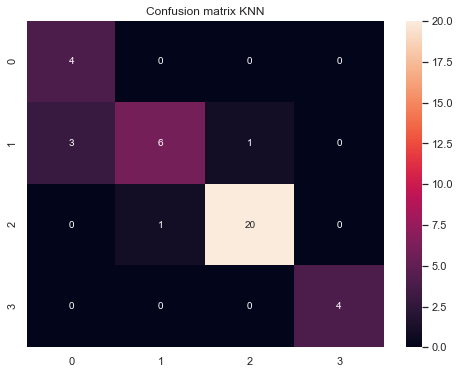

In [10]:
ut.knncapteur(data=data_capteur4,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8717948717948718
F1-score KNN :  0.8712454212454213
              precision    recall  f1-score   support

         air       0.67      1.00      0.80         4
     control       0.73      0.80      0.76        10
        copd       1.00      0.86      0.92        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.87        39
   macro avg       0.85      0.91      0.87        39
weighted avg       0.90      0.87      0.88        39



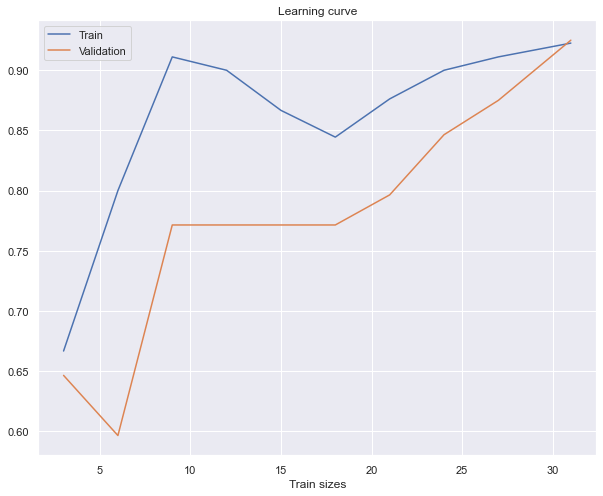

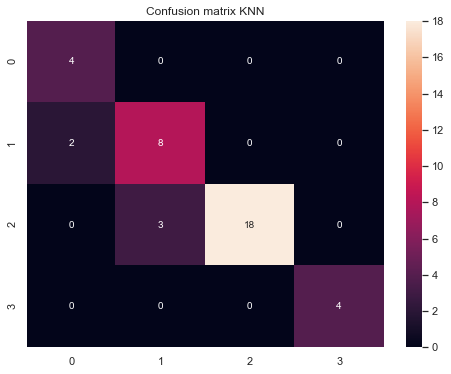

In [11]:
ut.knncapteur(data=data_capteur5,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9743589743589743
F1-score KNN :  0.9810281517747859
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.90      0.95        10
        copd       0.95      1.00      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.99      0.97      0.98        39
weighted avg       0.98      0.97      0.97        39



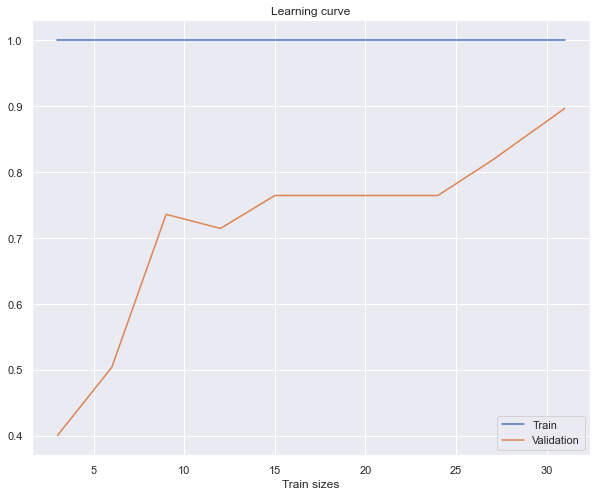

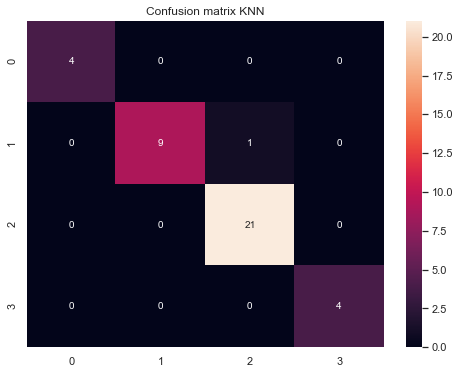

In [12]:
ut.knncapteur(data=data_capteur6,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9743589743589743
F1-score KNN :  0.9810281517747859
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.90      0.95        10
        copd       0.95      1.00      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.99      0.97      0.98        39
weighted avg       0.98      0.97      0.97        39



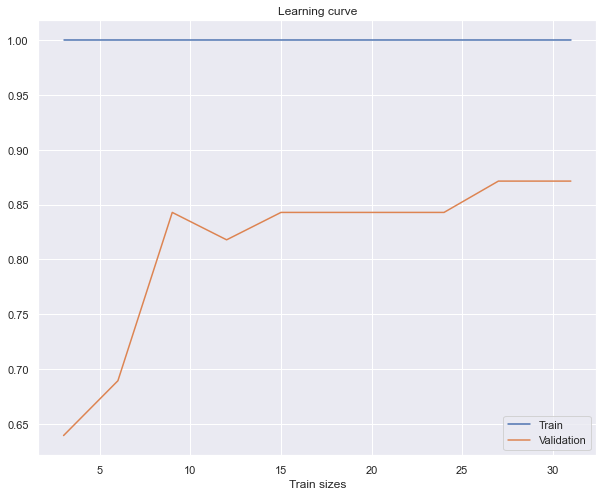

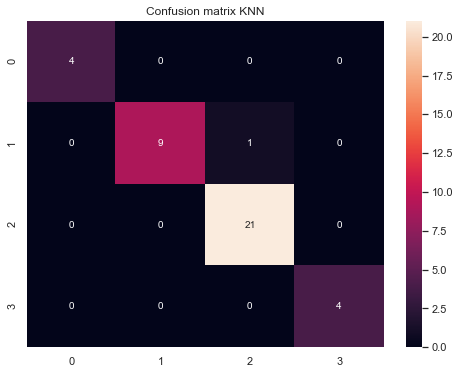

In [13]:
ut.knncapteur(data=data_capteur7,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8974358974358975
F1-score KNN :  0.903929539295393
              precision    recall  f1-score   support

         air       0.80      1.00      0.89         4
     control       0.80      0.80      0.80        10
        copd       0.95      0.90      0.93        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.90        39
   macro avg       0.89      0.93      0.90        39
weighted avg       0.90      0.90      0.90        39



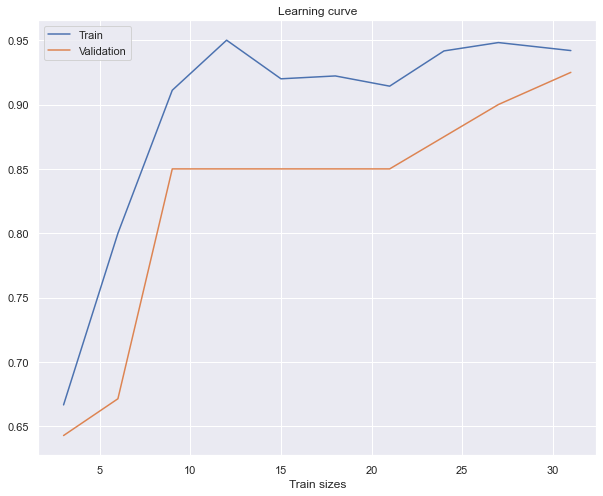

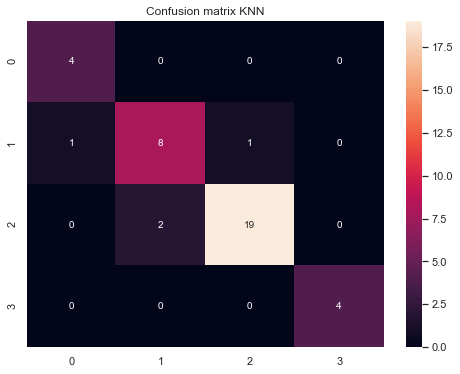

In [14]:
ut.knncapteur(data=data_capteur8,test_size=0.5)

## SVM

In [15]:
ut.svmcapteur(data=data_capteur1,test_size=0.5)

AttributeError: module 'utilities' has no attribute 'svmcapteur'

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9487179487179487
F1-score SVM :  0.963095238095238
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.90      0.90      0.90        10
        copd       0.95      0.95      0.95        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.95        39
   macro avg       0.96      0.96      0.96        39
weighted avg       0.95      0.95      0.95        39



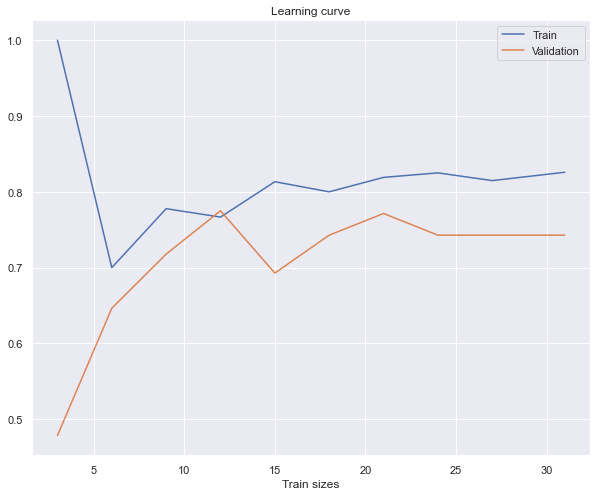

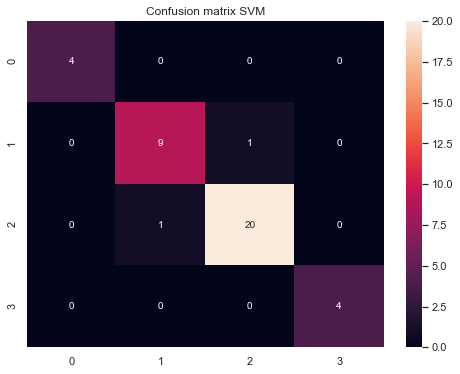

In [53]:
ut.svmcapteur(data=data_capteur2,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9230769230769231
F1-score SVM :  0.9430844553243574
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.89      0.80      0.84        10
        copd       0.91      0.95      0.93        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.92        39
   macro avg       0.95      0.94      0.94        39
weighted avg       0.92      0.92      0.92        39



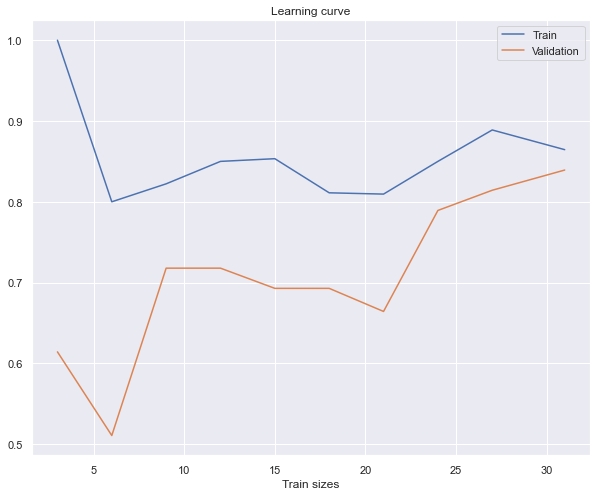

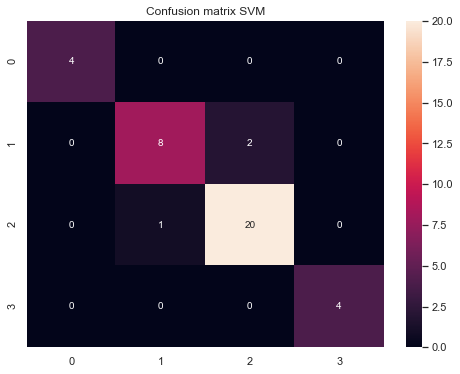

In [54]:
ut.svmcapteur(data=data_capteur3,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9230769230769231
F1-score SVM :  0.945993031358885
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.82      0.90      0.86        10
        copd       0.95      0.90      0.93        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.92        39
   macro avg       0.94      0.95      0.95        39
weighted avg       0.93      0.92      0.92        39



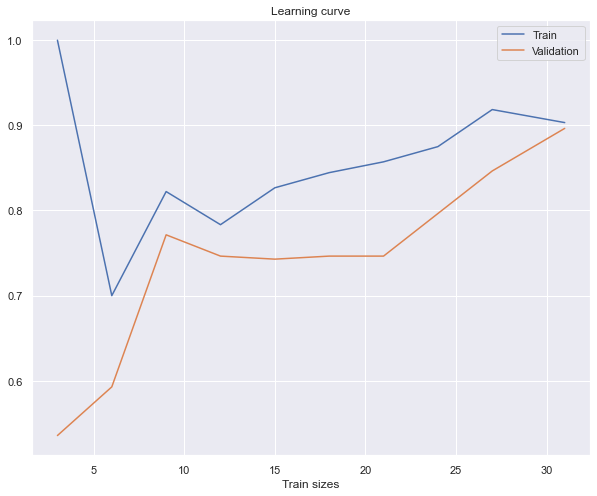

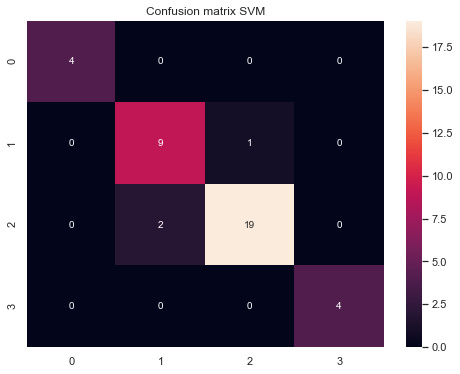

In [55]:
ut.svmcapteur(data=data_capteur4,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8205128205128205
F1-score SVM :  0.6753968253968254
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.82      0.90      0.86        10
        copd       0.79      0.90      0.84        21
      smoker       0.00      0.00      0.00         4

    accuracy                           0.82        39
   macro avg       0.65      0.70      0.68        39
weighted avg       0.74      0.82      0.78        39



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


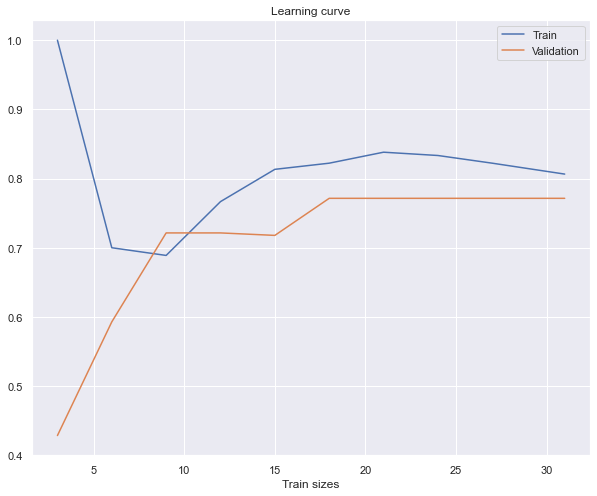

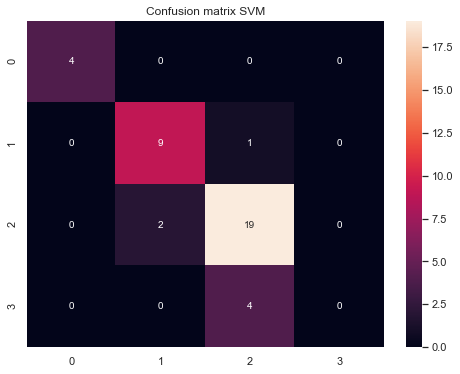

In [56]:
ut.svmcapteur(data=data_capteur5,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8205128205128205
F1-score SVM :  0.6701680672268907
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.70      0.82        10
        copd       0.75      1.00      0.86        21
      smoker       0.00      0.00      0.00         4

    accuracy                           0.82        39
   macro avg       0.69      0.68      0.67        39
weighted avg       0.76      0.82      0.78        39



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


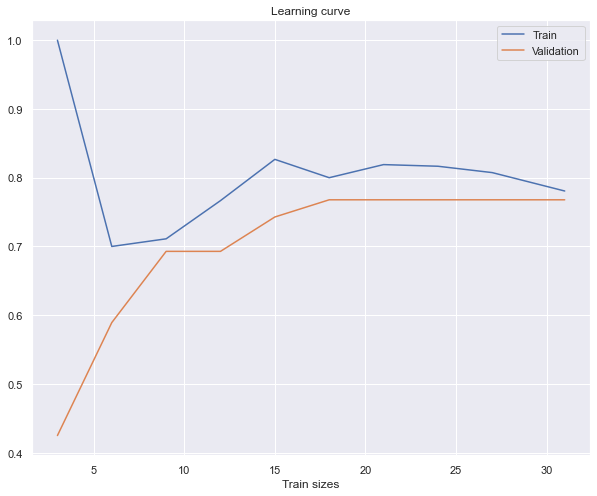

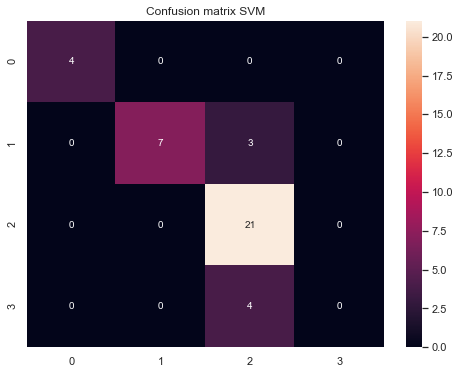

In [57]:
ut.svmcapteur(data=data_capteur6,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8461538461538461
F1-score SVM :  0.7746323529411765
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.70      0.82        10
        copd       0.78      1.00      0.88        21
      smoker       1.00      0.25      0.40         4

    accuracy                           0.85        39
   macro avg       0.94      0.74      0.77        39
weighted avg       0.88      0.85      0.83        39



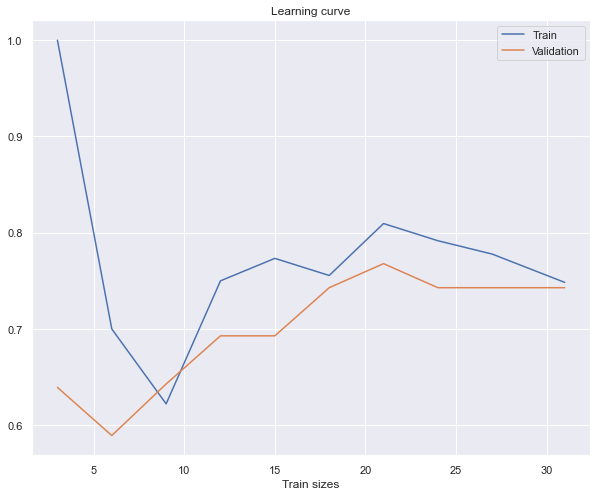

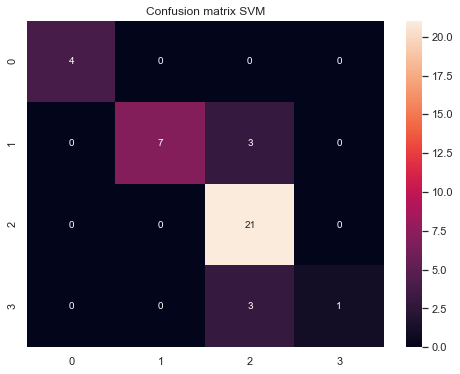

In [58]:
ut.svmcapteur(data=data_capteur7,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8205128205128205
F1-score SVM :  0.6732922732362822
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.89      0.80      0.84        10
        copd       0.77      0.95      0.85        21
      smoker       0.00      0.00      0.00         4

    accuracy                           0.82        39
   macro avg       0.66      0.69      0.67        39
weighted avg       0.74      0.82      0.78        39



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


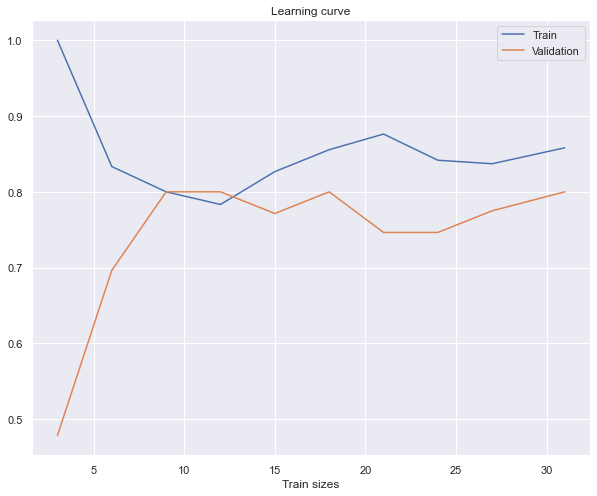

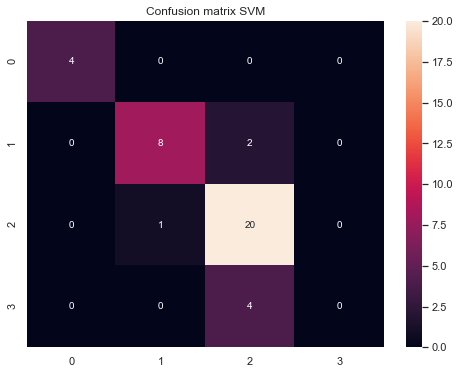

In [59]:
ut.svmcapteur(data=data_capteur8,test_size=0.5)

# Classification avec un réseau de neurones CNN 1D

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3568 - accuracy: 0.3023
Epoch 1: accuracy improved from -inf to 0.30233, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 326ms/step - loss: 1.3568 - accuracy: 0.3023 - val_loss: 1.3615 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2369 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.30233 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 3s 327ms/step - loss: 1.2369 - accuracy: 0.5349 - val_loss: 1.3066 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2159 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 118ms/step - loss: 1.2159 - accuracy: 0.5349 - val_loss: 1.2836 - val_accuracy: 0.4545
Epoch

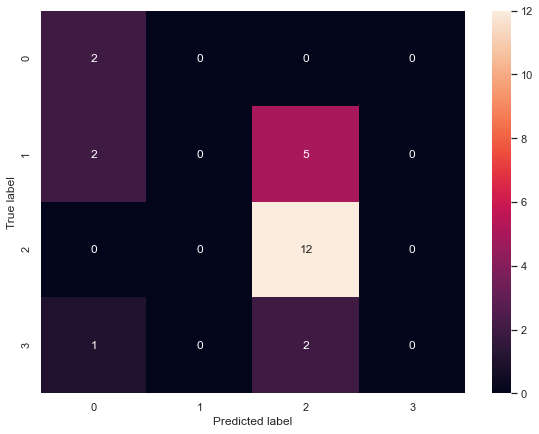

In [7]:
ut.cnn1D(data=data_capteur1, test_size=0.3)

In [12]:
features = data_capteur1.copy()
etiq = features['class']
features.drop(['class'], inplace=True, axis=1)
etiq = etiq.astype('category')

d = dict(enumerate(etiq.cat.categories))
d

{0: 'air', 1: 'control', 2: 'copd', 3: 'smoker'}

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3580 - accuracy: 0.4186
Epoch 1: accuracy improved from -inf to 0.41860, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 285ms/step - loss: 1.3580 - accuracy: 0.4186 - val_loss: 1.3598 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2940 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.41860 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 3s 342ms/step - loss: 1.2940 - accuracy: 0.5349 - val_loss: 1.3129 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2379 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 94ms/step - loss: 1.2379 - accuracy: 0.5349 - val_loss: 1.3229 - val_accuracy: 0.4545
Epoch 

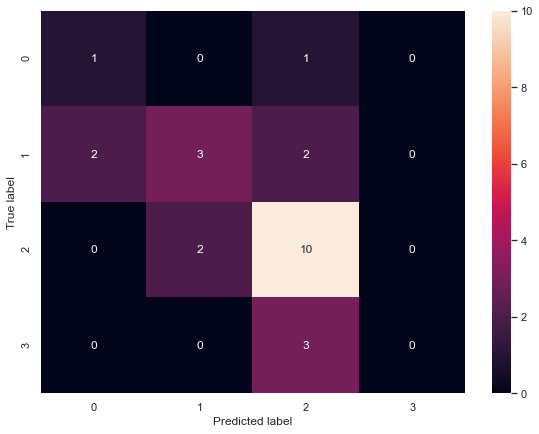

In [8]:
ut.cnn1D(data=data_capteur2, test_size=0.3)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3119 - accuracy: 0.5116
Epoch 1: accuracy improved from -inf to 0.51163, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 397ms/step - loss: 1.3119 - accuracy: 0.5116 - val_loss: 1.3321 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2185 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.51163 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 364ms/step - loss: 1.2185 - accuracy: 0.5349 - val_loss: 1.3055 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.1915 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 79ms/step - loss: 1.1915 - accuracy: 0.5349 - val_loss: 1.2964 - val_accuracy: 0.4545
Epoch 

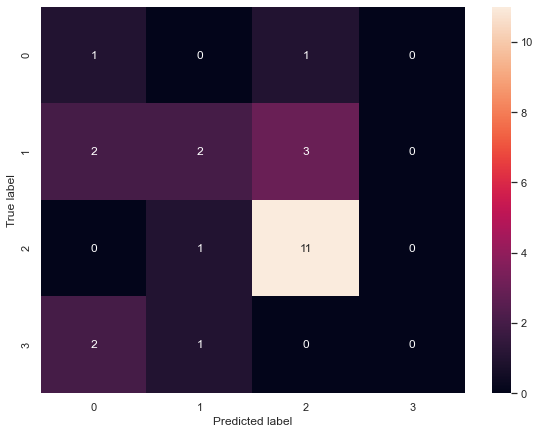

In [9]:
ut.cnn1D(data=data_capteur3, test_size=0.3)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3361 - accuracy: 0.4419
Epoch 1: accuracy improved from -inf to 0.44186, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 411ms/step - loss: 1.3361 - accuracy: 0.4419 - val_loss: 1.3297 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2042 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.44186 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 352ms/step - loss: 1.2042 - accuracy: 0.5349 - val_loss: 1.3037 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2532 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 99ms/step - loss: 1.2532 - accuracy: 0.5349 - val_loss: 1.2845 - val_accuracy: 0.4545
Epoch 

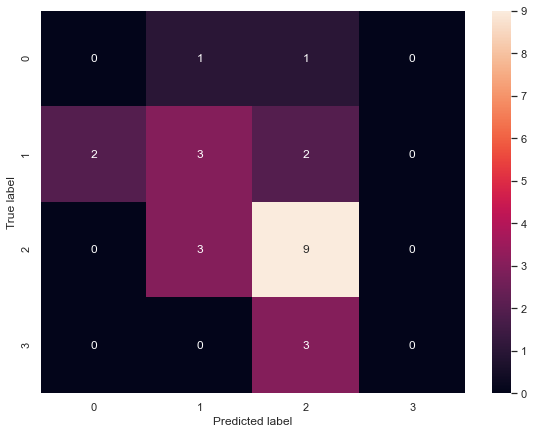

In [10]:
ut.cnn1D(data=data_capteur4, test_size=0.3)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3165 - accuracy: 0.3256
Epoch 1: accuracy improved from -inf to 0.32558, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 6s 470ms/step - loss: 1.3165 - accuracy: 0.3256 - val_loss: 1.3191 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.1744 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.32558 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 482ms/step - loss: 1.1744 - accuracy: 0.5349 - val_loss: 1.2669 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.1947 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 102ms/step - loss: 1.1947 - accuracy: 0.5349 - val_loss: 1.2812 - val_accuracy: 0.4545
Epoch

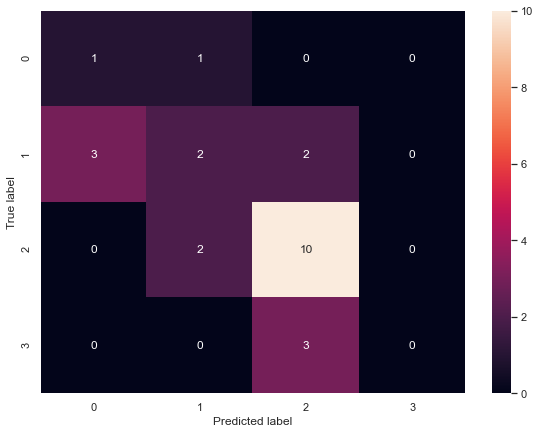

In [11]:
ut.cnn1D(data=data_capteur5, test_size=0.3)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3528 - accuracy: 0.2326
Epoch 1: accuracy improved from -inf to 0.23256, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 7s 544ms/step - loss: 1.3528 - accuracy: 0.2326 - val_loss: 1.3510 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2551 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.23256 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 465ms/step - loss: 1.2551 - accuracy: 0.5349 - val_loss: 1.2951 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2709 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 96ms/step - loss: 1.2709 - accuracy: 0.5349 - val_loss: 1.3091 - val_accuracy: 0.4545
Epoch 

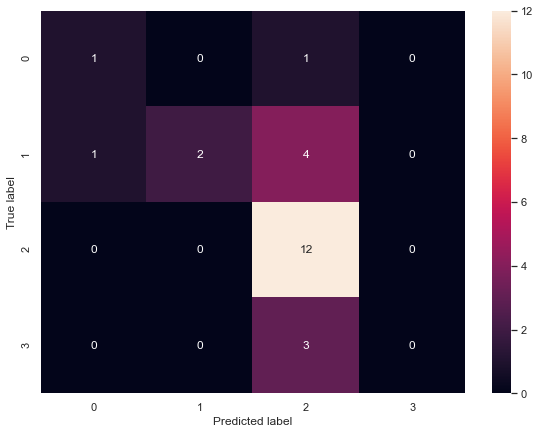

In [12]:
ut.cnn1D(data=data_capteur6, test_size=0.3)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3690 - accuracy: 0.4651
Epoch 1: accuracy improved from -inf to 0.46512, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 7s 503ms/step - loss: 1.3690 - accuracy: 0.4651 - val_loss: 1.3406 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2362 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.46512 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 457ms/step - loss: 1.2362 - accuracy: 0.5349 - val_loss: 1.2735 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2031 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 101ms/step - loss: 1.2031 - accuracy: 0.5349 - val_loss: 1.2758 - val_accuracy: 0.4545
Epoch

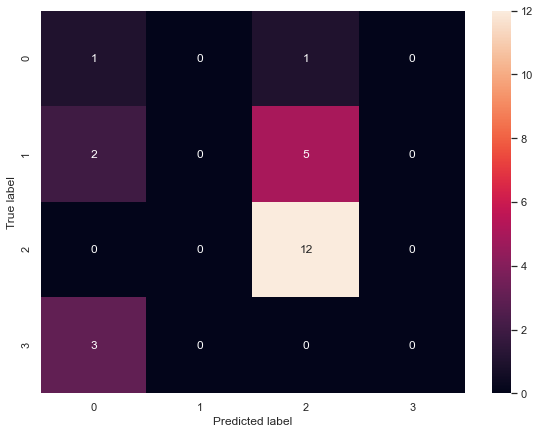

In [13]:
ut.cnn1D(data=data_capteur7, test_size=0.3)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3795 - accuracy: 0.3023
Epoch 1: accuracy improved from -inf to 0.30233, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 354ms/step - loss: 1.3795 - accuracy: 0.3023 - val_loss: 1.3654 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2660 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.30233 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 468ms/step - loss: 1.2660 - accuracy: 0.5349 - val_loss: 1.3102 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.1744 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 77ms/step - loss: 1.1744 - accuracy: 0.5349 - val_loss: 1.2452 - val_accuracy: 0.4545
Epoch 

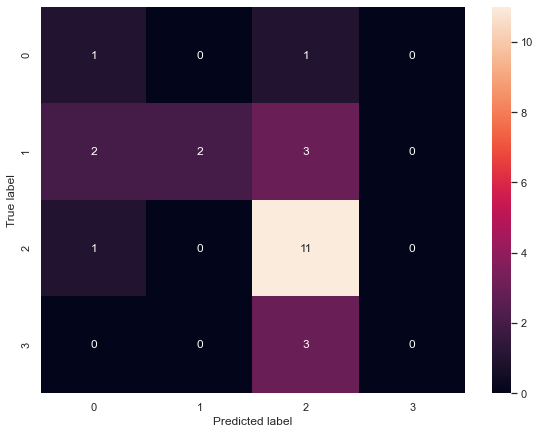

In [14]:
ut.cnn1D(data=data_capteur8, test_size=0.3)

On voit maintenant le résultat si on additionne tous les résultats

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3671 - accuracy: 0.4651
Epoch 1: accuracy improved from -inf to 0.46512, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 5s 356ms/step - loss: 1.3671 - accuracy: 0.4651 - val_loss: 1.3595 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2713 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.46512 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 3s 309ms/step - loss: 1.2713 - accuracy: 0.5349 - val_loss: 1.3035 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2040 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 108ms/step - loss: 1.2040 - accuracy: 0.5349 - val_loss: 1.2918 - val_accuracy: 0.4545
Epoch

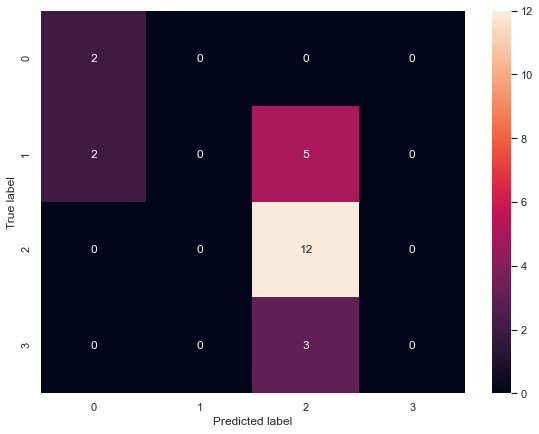

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3054 - accuracy: 0.4884
Epoch 1: accuracy improved from -inf to 0.48837, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 264ms/step - loss: 1.3054 - accuracy: 0.4884 - val_loss: 1.3278 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.1983 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.48837 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 3s 310ms/step - loss: 1.1983 - accuracy: 0.5349 - val_loss: 1.3013 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2034 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 111ms/step - loss: 1.2034 - accuracy: 0.5349 - val_loss: 1.2932 - val_accuracy: 0.4545
Epoch

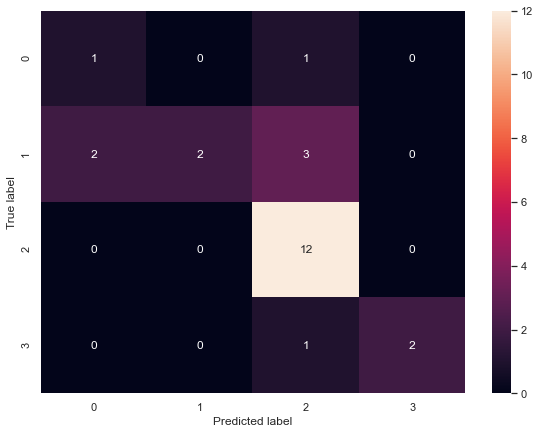

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3387 - accuracy: 0.4651
Epoch 1: accuracy improved from -inf to 0.46512, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 6s 408ms/step - loss: 1.3387 - accuracy: 0.4651 - val_loss: 1.3375 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2264 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.46512 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 364ms/step - loss: 1.2264 - accuracy: 0.5349 - val_loss: 1.2805 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.1772 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 105ms/step - loss: 1.1772 - accuracy: 0.5349 - val_loss: 1.2825 - val_accuracy: 0.4545
Epoch

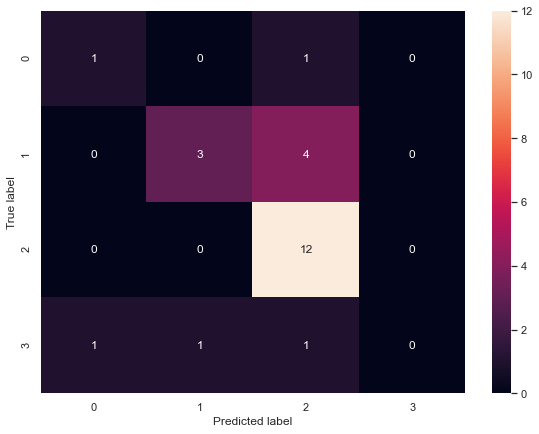

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3367 - accuracy: 0.4651
Epoch 1: accuracy improved from -inf to 0.46512, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 283ms/step - loss: 1.3367 - accuracy: 0.4651 - val_loss: 1.3450 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2875 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.46512 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 347ms/step - loss: 1.2875 - accuracy: 0.5349 - val_loss: 1.3267 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2420 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 104ms/step - loss: 1.2420 - accuracy: 0.5349 - val_loss: 1.3205 - val_accuracy: 0.4545
Epoch

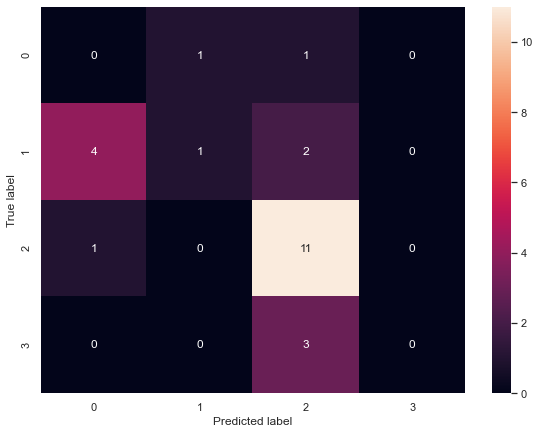

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3530 - accuracy: 0.4186
Epoch 1: accuracy improved from -inf to 0.41860, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 317ms/step - loss: 1.3530 - accuracy: 0.4186 - val_loss: 1.3495 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2721 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.41860 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 3s 296ms/step - loss: 1.2721 - accuracy: 0.5349 - val_loss: 1.2866 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.1875 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 102ms/step - loss: 1.1875 - accuracy: 0.5349 - val_loss: 1.3019 - val_accuracy: 0.4545
Epoch

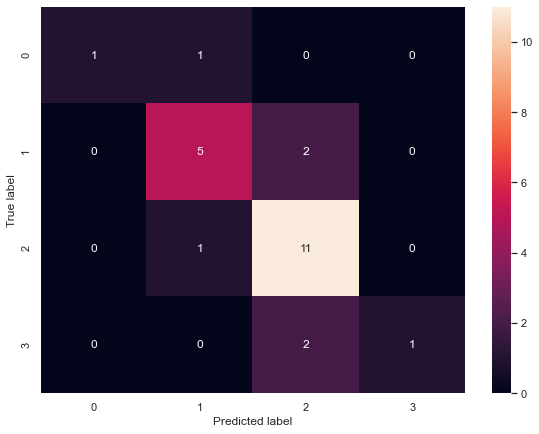

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3399 - accuracy: 0.5349
Epoch 1: accuracy improved from -inf to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 288ms/step - loss: 1.3399 - accuracy: 0.5349 - val_loss: 1.3208 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.1965 - accuracy: 0.5349
Epoch 2: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 99ms/step - loss: 1.1965 - accuracy: 0.5349 - val_loss: 1.2916 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.1829 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 95ms/step - loss: 1.1829 - accuracy: 0.5349 - val_loss: 1.2893 - val_accuracy: 0.4545
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 1.1601 - accuracy: 0.5349
Epoc

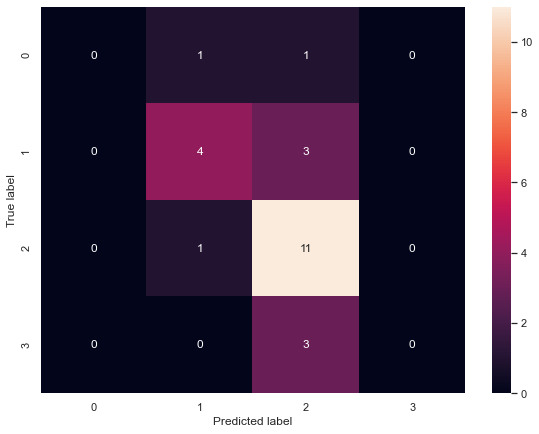

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3804 - accuracy: 0.2791
Epoch 1: accuracy improved from -inf to 0.27907, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 333ms/step - loss: 1.3804 - accuracy: 0.2791 - val_loss: 1.3545 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2707 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.27907 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 3s 283ms/step - loss: 1.2707 - accuracy: 0.5349 - val_loss: 1.2808 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2027 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 99ms/step - loss: 1.2027 - accuracy: 0.5349 - val_loss: 1.2524 - val_accuracy: 0.4545
Epoch 

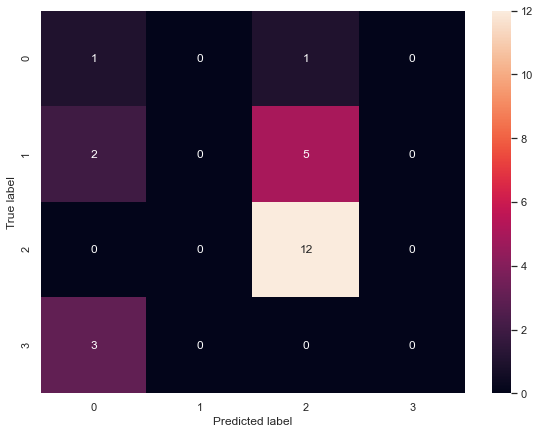

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.3217 - accuracy: 0.4651
Epoch 1: accuracy improved from -inf to 0.46512, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 4s 276ms/step - loss: 1.3217 - accuracy: 0.4651 - val_loss: 1.3380 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.2402 - accuracy: 0.5349
Epoch 2: accuracy improved from 0.46512 to 0.53488, saving model to .\Model_CNN1D
INFO:tensorflow:Assets written to: .\Model_CNN1D\assets
11/11 [==============================] - 3s 333ms/step - loss: 1.2402 - accuracy: 0.5349 - val_loss: 1.3060 - val_accuracy: 0.4545
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2055 - accuracy: 0.5349
Epoch 3: accuracy did not improve from 0.53488
11/11 [==============================] - 1s 97ms/step - loss: 1.2055 - accuracy: 0.5349 - val_loss: 1.3055 - val_accuracy: 0.4545
Epoch 

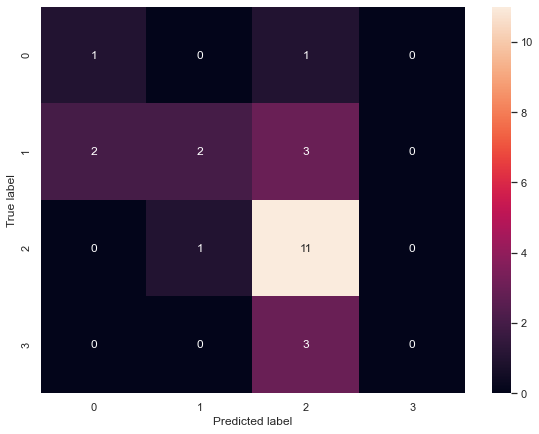

In [7]:
y_cap1, y_cap1_max = ut.cnn1D(data=data_capteur1, test_size=0.3)
y_cap2, y_cap2_max = ut.cnn1D(data=data_capteur2, test_size=0.3)
y_cap3, y_cap3_max = ut.cnn1D(data=data_capteur3, test_size=0.3)
y_cap4, y_cap4_max = ut.cnn1D(data=data_capteur4, test_size=0.3)
y_cap5, y_cap5_max = ut.cnn1D(data=data_capteur5, test_size=0.3)
y_cap6, y_cap6_max = ut.cnn1D(data=data_capteur6, test_size=0.3)
y_cap7, y_cap7_max = ut.cnn1D(data=data_capteur7, test_size=0.3)
y_cap8, y_cap8_max = ut.cnn1D(data=data_capteur8, test_size=0.3)

In [11]:
y_cap_tot = list()
for i in range(len(y_cap1_max)) :
    y_cap_tot.append((y_cap1_max[i],y_cap2_max[i],y_cap3_max[i], y_cap4_max[i], y_cap5_max[i], y_cap6_max[i], y_cap7_max[i], y_cap8_max[i]))
y_cap_tot

[(2, 2, 2, 2, 2, 2, 2, 2),
 (2, 3, 0, 2, 3, 2, 0, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (0, 2, 2, 2, 0, 2, 0, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 1, 2, 2, 2, 0, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (0, 0, 1, 0, 1, 1, 0, 0),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (0, 0, 0, 1, 1, 1, 2, 0),
 (2, 0, 2, 0, 1, 1, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 1, 2, 1, 1, 1, 2, 1),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (2, 3, 2, 2, 2, 2, 0, 2),
 (2, 2, 2, 0, 1, 1, 2, 1),
 (2, 2, 2, 2, 2, 2, 2, 2),
 (0, 1, 1, 0, 1, 1, 0, 0),
 (2, 2, 1, 0, 1, 2, 2, 1)]

In [14]:
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

def create_y(ymodel) :
    y_tot = list()
    for i in range(len(ymodel)) :
        y_tot.append(most_frequent(ymodel[i]))
    return y_tot

In [15]:
y_tot = create_y(y_cap_tot)

In [17]:
features = data_capteur1.copy()
etiq = features['class']
features.drop(['class'], inplace=True, axis=1)
etiq = etiq.astype('category').cat.codes
features_train, features_test, labels_train, labels_test = train_test_split(features, etiq, test_size=0.3,random_state=42)

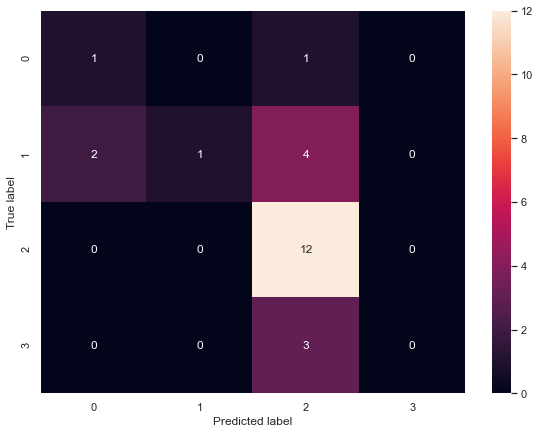

In [18]:
con_mat = tf.math.confusion_matrix(labels=labels_test, predictions=y_tot).numpy()
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

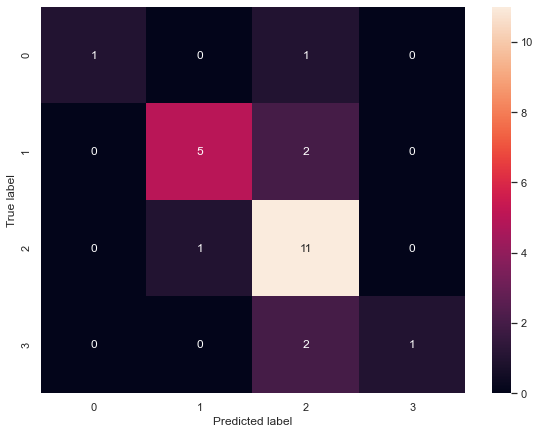

In [20]:
y_cap_tot = list()
for i in range(len(y_cap1_max)) :
    y_cap_tot.append((y_cap5_max[i],y_cap2_max[i],y_cap3_max[i], y_cap6_max[i], y_cap8_max[i]))
y_tot = create_y(y_cap_tot)

con_mat = tf.math.confusion_matrix(labels=labels_test, predictions=y_tot).numpy()
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

On retrouve alors avec cette méthode une précision d'environ 75%. Maintenant avec un soft voting

In [46]:
y_cap_tot = y_cap1 + y_cap2 + y_cap3 + y_cap4 + y_cap5 + y_cap6 + y_cap7 + y_cap8
y_cap_tot

array([[0.95854837, 2.5107477 , 3.6611753 , 0.86952865],
       [1.1738211 , 1.1797571 , 3.000548  , 2.6458738 ],
       [0.5976038 , 1.7212174 , 3.9800303 , 1.7011486 ],
       [0.5058273 , 1.7711009 , 4.246249  , 1.4768229 ],
       [0.36130467, 1.4148035 , 4.6408873 , 1.5830047 ],
       [2.1651373 , 1.8729277 , 2.6432428 , 1.3186918 ],
       [0.21235597, 1.2553099 , 5.2796803 , 1.2526541 ],
       [1.0230968 , 1.7433472 , 3.488608  , 1.7449481 ],
       [0.83003944, 2.499383  , 3.6705208 , 1.000057  ],
       [3.1166928 , 2.7735188 , 1.3439091 , 0.76587903],
       [0.9544421 , 2.5204473 , 3.5309784 , 0.99413204],
       [0.57252914, 1.8503585 , 4.1896753 , 1.3874372 ],
       [3.0828242 , 2.6904802 , 1.6163194 , 0.61037606],
       [1.8964114 , 2.868568  , 2.3569007 , 0.87811947],
       [0.69873357, 2.2002616 , 3.9554715 , 1.1455332 ],
       [0.6772078 , 1.914249  , 3.8999016 , 1.508642  ],
       [0.49799734, 1.9401226 , 4.3687    , 1.1931803 ],
       [1.629681  , 2.9115248 ,

In [47]:
y_cap_tot = y_cap_tot.tolist()
y_cap_tot

[[0.958548367023468, 2.5107476711273193, 3.66117525100708, 0.8695286512374878],
 [1.1738210916519165,
  1.1797571182250977,
  3.0005478858947754,
  2.645873785018921],
 [0.5976037979125977,
  1.721217393875122,
  3.9800302982330322,
  1.7011486291885376],
 [0.5058273077011108,
  1.7711008787155151,
  4.246249198913574,
  1.476822853088379],
 [0.3613046705722809,
  1.4148035049438477,
  4.640887260437012,
  1.5830047130584717],
 [2.16513729095459, 1.8729276657104492, 2.643242835998535, 1.3186918497085571],
 [0.21235597133636475,
  1.2553099393844604,
  5.279680252075195,
  1.2526540756225586],
 [1.0230967998504639, 1.74334716796875, 3.488607883453369, 1.744948148727417],
 [0.8300394415855408,
  2.499382972717285,
  3.670520782470703,
  1.0000569820404053],
 [3.1166927814483643,
  2.7735188007354736,
  1.3439091444015503,
  0.7658790349960327],
 [0.9544420838356018,
  2.520447254180908,
  3.5309784412384033,
  0.9941320419311523],
 [0.572529137134552, 1.850358486175537, 4.189675331115723

In [48]:
y_tot = list()
for i in range(len(y_cap_tot)) :
    y_tot.append(np.argmax(y_cap_tot[i]))
y_tot

[2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1]

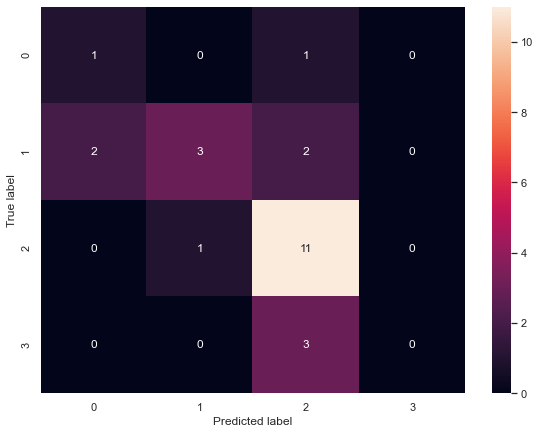

In [49]:
con_mat = tf.math.confusion_matrix(labels=labels_test, predictions=y_tot).numpy()
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Si on sélectionne que les meilleur maintenant comme on a fait avec le hard voting

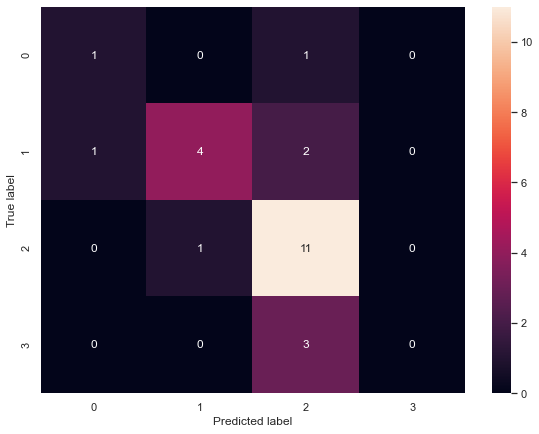

In [51]:
y_cap_tot = y_cap2 + y_cap3 + y_cap5 + y_cap6 + y_cap8
y_cap_tot = y_cap_tot.tolist()
y_tot = list()
for i in range(len(y_cap_tot)) :
    y_tot.append(np.argmax(y_cap_tot[i]))
con_mat = tf.math.confusion_matrix(labels=labels_test, predictions=y_tot).numpy()
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Alors on retrouve dans ce problème un résultat maximum de 75% en utilisant un réseau de neurone convolutif